# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
<br>
<br>
**Does the Smartcab move at all during the simulation?**
<br>
No, the car stays in the same place at all time.
<br>
<br>
**What kind of rewards is the driving agent receiving?**
<br>
I have run the simulation for a couple of minutes, and the result of the reward score is very fluctuating, so there is not a clear progressing in the learning pattern. The reward score has ranged from 5,58 to 2,78 back 
and forth out from.
<br>
<br>
**How does the light changing color affect the rewards?**
<br>
The reward score is positive when the light is red and gets negative when the light is green.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**
<br>
<br>
**In the agent.py Python file, choose three flags that can be set and explain how they change the simulation.**
<ol>
<li>The learning flag can be set to true or false to force the reinforcement algorithm to use Q learning.</li>  
<li>The num_ dummies can be set to 1-100. Its function is to determine the number of agents there will be runed in the simulation.</li>    
<li>grid_size flag is the size of the map there will be created. It can be set to 'X' columns and 'X' rows to change the map size.</li>
</ol>
<br>
**In the environment.py Python file, what Environment class function is called when an agent performs an action?**
<br>
The function is call act(). Its function is to "Consider an action and perform the action if it is legal and return a reward base on traffic laws".
<br>
<br>
**In the simulator.py Python file, what is the difference between the 'render_text()' function and the 'render()' function?**
<br>
- render_text() function is a non-GUI render of the simulation.  The Simulated trial data will be rendered in the terminal/command prompt.
<br>
- render() function is the opposite it is a GUI render display of the simulation.
<br>

**In the planner.py Python file, will the 'next_waypoint() function consider the North-South or East-West direction first?**
<br>
The next_waypoint() function consider "East-West" direction first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


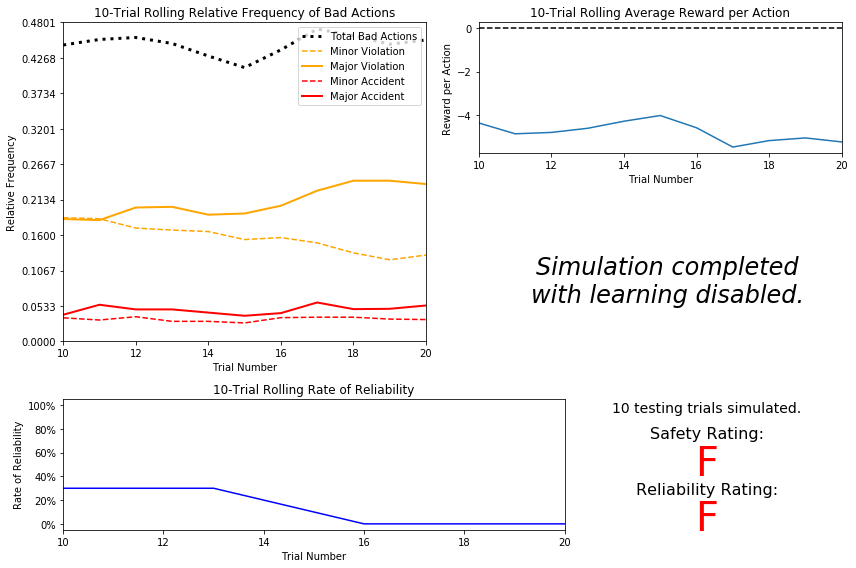

In [10]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
<br>
**How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?**
<br>
The agent make bad decisions there ranged from about 43% to 48% of the times and out of the that does the agent make minor accidents 4% to 5% and major accidents 4.5% to 6% out of 20 trails. 
<br>
<br>
**Given that the agent is driving randomly, does the rate of reliability make sense?**
<br>
No, I will not say it make any sense for the agent's reliability or reaching its goal in time safely because everything the agent does is random and therefore unreliable. It is only luck if the agent does achieve its goal in time and all the rewards the agent gathered are with no thought of what action is best to take in the giving situation therefore is the graph of the simulation also unreliable because the outcome will be random every time there will be run a new simulation of the agent.
<br>
<br>
**What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?**
<br>
The agent has rewards ranged from -162 to 37 and the average reward is from about -4 to -6 so I will say the agent has been penalized heavily most through the 20 trails.
<br>
<br>
**As the number of trials increases, does the outcome of results change significantly?**
<br>
ill say the agent keep making bad decisions pretty steady throughout the 20 trail. There is only a small decrease in bad action made of the agent some are in the middle of the graph some goes up again fast at the end. The same can be said about the rewards some have a slight increase in the middle because the agent has made a little less bad decisions between 14 to 16 trails run but still very bad for all the action taken of the agent.
<br>
<br>
**Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?**
<br>
No I will not consider it safe to drive passengers in because the car is too dangerous and unreliable because it has no sense of what is the right action to take because it makes all its action out of random decisions and not out from experience.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

<ol>

 <h3>relevant</h3>
<br>

<li><b>the waypoint</b> feature is important for the agent to determine what action to take for reaching the waypoint. Without it will the agent not have an efficient way to make it to the waypoint in for the deadline in a consistent way and therefore is it essential to have for the agent to function properly .</li><br>

<li><b>inputs</b> is important because the agent uses the input data to get information to the agent so it can know if there is a light ahead or oncoming traffic without it will the agent not have that ability to do that, so it is like the eyes of the agent and therefore one of the most important features to include .</li><br>
    
<li><b>oncoming</b> traffic is important to know for the agent for keeping the agent safe and efficient because if an agent misses or not detecting a car in a state before entering it will that result in a collision between the agent and the car som are the worst case scenario there can happen.</li><br>

<li><b>light</b> is an essential feature for the safety and getting efficient to the goal without mistakes because it is the indicator for oncoming traffic from both sides and therefore needs to be there if the agent should have a chance to get safe and efficient to the goal.</li><br>

<h3>Not relevant</h3>
<br>
<li><b>deadline</b> input is not essential for the agent in my opinion because it is the number of steps left the agent has to make it to the waypoint in for the deadline, so it will not tell if the agent is close to the waypoint or help the agent to make safe decision. Instead of will the make the state's space bigger and therefore be a worsening of the agents in learning and end up with more training trails and can also result in bad decisions for making it faster to the waypoint </li><br>

<li><b>Turning left and right</b> is unnecessary features in my opinion even if the law says 'you can turn right for red light if you can avoid a collision from left oncoming traffic' because the agent already have red light and oncoming traffic input in it state space so the agent can still learn the optimal policy, e.g., if there is red light and there is no oncoming traffic from left, and the agent go right will the agent still be giving a reward for it and thereby learn it is okay to do that action. The same can be said for an illegal left turns, if we take the same example but drive left instead of right will the agent be punished for it and be giving a minus score so I don't see why it will be necessary to include left and right turns, if the agent can learn the policies without adding more inputs, plus the state space will be a lot smaller without them.  </li><br>

Her is giving 8 polices some capture the traffic laws for right and left turns some shows what to do in a giving state the agent is in and thereby shows how easy the agent can learn the 2 traffic laws for right and left turns without any extra input for it. So I will mean right and left input will be more harmful to the agent to implement because the state space will be so much bigger without any benefit because the 8 policies will still be there but much harder to learn for the agent because the agent needs to learn so much more with every input added to the state space instead of just learning the 8 polices.



| state | actions |
| :-:| :-: | :-: |
| 'red', 'right', None| right |
| 'red', 'right', Left| None |
| 'red', 'right', right| right |
| 'red', 'right', forward| None|



| state | actions |
| :-:| :-: | :-: |
| 'green', 'left', forward| forward or right |
| 'green', 'left', right| left |
| 'green', 'left', left| left |
| 'green', 'left', None| left |

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**
<br>
**Consider the combinations of features to calculate the total number of states!**
<br>
if the state has 3 features from <b>Question 4</b> where the input is not counted with because it is input for light and oncoming traffic, so it is used together and therefore do not have its own options.  So will all possible combinations of states be:
<br>
<br>
<b>Waypoint</b>: left, right, forward
<br>
<b>light</b>: red, green
<br>
<b>oncoming</b>: None, left, right, forward
<br>
<br>
3 x 2 x 4 = 24
<br>
<br>
if we so calculate the number of actions with for each state will it be:
<br>
<br>
<b>valid actions</b>: None, left, right, forward
<br>
<br>
24 x 4 = 96

**do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials**
<br>
Yes, I think the agent will not have to run that much training trails for learning the policies in a short period maybe 100-150 training trails.


### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

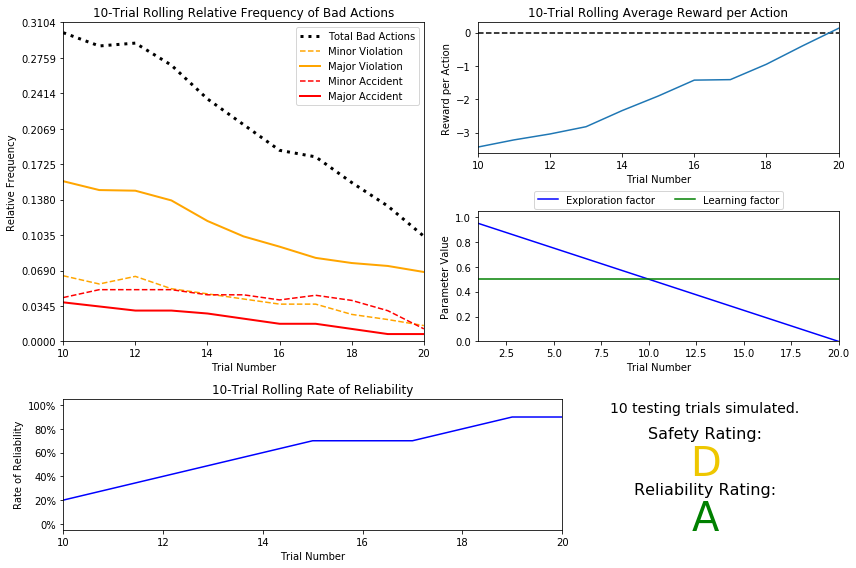

In [13]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
<br>
**Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?**
<br>
The agent makes still a lot of bad actions. I think it is because the agent only has 20 trails so it can't learn every state it should, so it is still unreliable in its actions.
<br>
<br>
**Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?**
<br>
The agent has 20 training trails and 10 testing. The epsilon tolerance is going way to fast down in my opinion so it will help a lot if the agent has a more smooth decay and a lower number for alpha.
<br>
<br>
**Is the decaying function you implemented for  ϵϵ  (the exploration factor) accurately represented in the parameters panel?**
<br>
Yes, I will say it is implemented correctly as it should be but still needs some tweaking for making it 100% optimized so epsilon will decay slowly over time. I have run the simulation 10 times, and I will get different results every time I expect the reason for it is because the agent doesn't have time to learn all policies, so there is still a lot of random in what state the agent learns first to get the end result under the training process so I will get different scores for every time I run a simulation.

I have made a graph of all 10 times I have run the simulation her.

| simulations | safety rating | Reliability rating |
| :-:| :-: | :-: |
| 1| A+ | A |
| 2| A+ | A+ |
| 3| A+ | A+ |
| 4| A+ | B |
| 5| D | A |
| 6| F | A |
| 7| D | A |
| 8| A+ | A+ |
| 9| F | A+ |
| 10| D | A |

<br>
<br>
**As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?
How does the safety and reliability rating compare to the initial driving agent?**
<br>
Yes, the agent makes lot fewer mistakes with more trails and learns what action it should take so the reward increase a lot but the agent doesn't have time to learn everyting, so it is not reliable yet.


-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

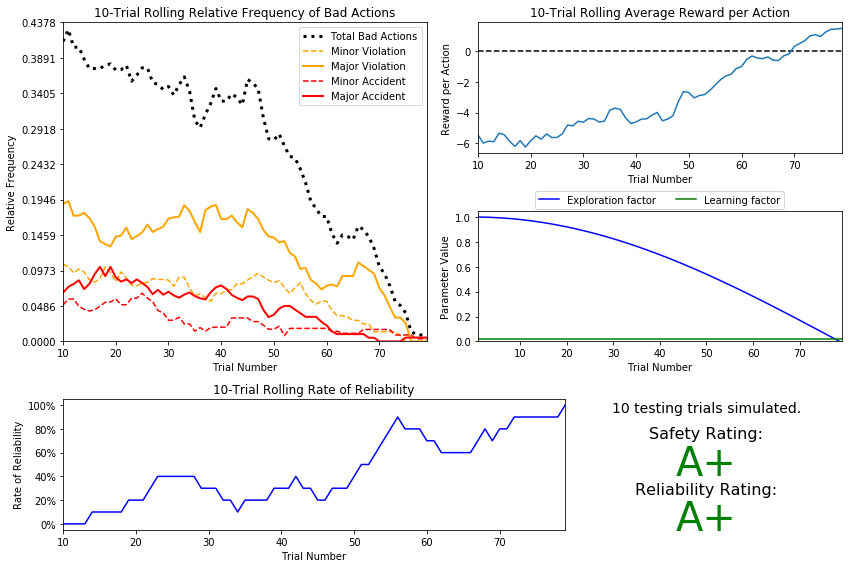

In [2]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
# 
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
<br>
#### What decaying function was used for epsilon (the exploration factor)?####
I have used some different ones but the first one I started with is:
<br>
**epsilon - 0.5**
<br>
<br>
then I tried some different one to get a more smooth decay, and I end up with:
<br>
**cos(at)**
<br>
<br>
some give me a nice curve some work really well with the agent in learning.
<br>
#### Approximately how many training trials were needed for your agent before begining testing?####
I find the golden number for the agent to be 79 training trails where I have set alpha to 0.2 to get the result. The reason for the number of trails is perfect in my opinion is because the agent is not trained unnecessary for too long.
<br>
#### What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?####
I have used:
<br>
<br>
epsilon = 1
<br>
alpha = 0.02
<br>
<br>
The reason for using these numbers is because the epsilon should be high enough so the agent will run the 79 training trails and alpha should be low enough so epsilon will not decay to fast. So I found the standard number(1.0) for epsilon work great in this seturation and lowered the alpha to (0.2) so epsilon will decay slower.
<br>
#### How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?####
The agent has improved a lot and is much more reliable and safe with a score A+ both in safety and reliability, so I will say there has been a significant improvement overall with the Q-table and therefore also the agent's decision making. The agent now knows most of all the states and the most optimal actions to take without a lot of accidents.
<br>
#### Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?####
Yes, definitely the graph for bad action is overall low and close to 0 where the reliability rate is 100%, so the agent is now safe and reliable and therefore also have learned the policy, so it knows what to do in every state in can encounter in its way.
<br>
#### Are you satisfied with the safety and reliability ratings of the Smartcab?####
Yes, 100% it is A+ so it can't be better in that.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

### Please summarize what the optimal policy is for the smartcab in the given environment.####

Her is an explanation for the most optimal policy for the smartcab. The reason for I only have used to explanations some are red and green light is because the holde simulation is just intersections and therefore will the agent only encounter decisions where it needs to go for red and green light and avoid other cars in the simulation for getting to the waypoint.
<br>
<br>
**The optimal policies for red light**
<br>
The optimal policies will be if there is 'red' light hold back for traffic if the agent shall go 'forward' or 'left' else if the agent shall go 'right,' go 'right' if there is no oncoming traffic from left or forward else hold back. 
<br>
<br>
**The optimal policies for green light**
<br>
The optimal policy for green light is if the agent shall go 'forward,' 'left' or 'right' go unless the agent shall go 'left' and there is oncoming traffic from forward then hold back else go forward or right. 

<br>
<br>
Her is an example of an optimal policy it shows the 'state' the smartcab is in and what 'action' it will take. I have given 2 examples of what will be an optimal policy and a 2 incorrect ones. I have also provided 2 example of a sub-optimal action some is an action there is not the optimal but not incorrect in terms of safety but more in terms of efficiency.
<br>
<br>

the states in order: state = inputs['light'], waypoint, inputs['oncoming']

<br>
<br>

| state | actions | policy |
| :-:| :-: | :-: |
| 'red', 'forward', None| None | optimal |
| 'green', 'forward', None| forward | optimal |
| 'red', 'forward', None| forward | incorrect  |
| 'green', 'forward', None| None | incorrect  |
| 'green', 'forward', None| right | sub-optimal |
| 'green', 'forward', None| left | sub-optimal  |


<br>

### investigate the 'sim_improved-learning.txt' text file to see the results of your improved Q-Learning algorithm####
This policy is the police with the highest value for 'None' in the Q-table. It shows the agent has learned to stop for 'red' light if it shall go 'forward' for getting to the waypoint even if there no traffic.
<br>

 **policy (the action with the highest value)**
 <br>
<lo>
    ('red', 'forward', None)
    <li>-- forward : -9.44
    <li>-- left : -7.39
    <li>-- right : -0.24
    <li>-- None : 1.38


</lo>

<br>

#### Are there any states where the policy is different than what would be expected from an optimal policy?####
I have not found much in the Q-table I did not expect, but I found this police some shows the agent have not tried 'right' and 'forward' som is not a problem in this cases because 'None' is the most optimal action but if the agent instead have not tried 'None' will the agent not have learned this police and that can be a problem, so it shows the agent has not learned all actions in all policies yet but close. The solution will be to run the agent 20-30 training trails more so all action will have been tried out.  

<br>
<lo>
    ('red', 'forward', 'right')
    <li>-- forward : 0.00
    <li>-- left : -3.84
    <li>-- right : 0.00
    <li>-- None : 0.32


</lo>

<br>

### Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

Her is an example of the agent have learned a optimal policy for red lights. The policy stays the agent should do 'None' if there is a 'red' light even if there is no traffic so it shows the agent knows the traffic laws for 'red' lights.

<br>

<lo>
    ('red', 'forward', None)
    <li>-- forward : -9.44
    <li>-- left : -7.39
    <li>-- right : -0.24
    <li>-- None : 1.38

</lo>

<br>

Her is another example where there is 'green' light instead of. The policy says the agent should go 'forward' even if there is traffic oncoming from 'forward' but the agent knows it can go because it will not cross lanes with the other car and therefore is a safe action to take.

<lo>
    ('green', 'forward', 'forward')
    <li>-- forward : 0.63
    <li>-- left : -1.53
    <li>-- right : 0.13
    <li>-- None : -0.65

<lo>

<br>

### Try to find at least one entry where the smartcab did not learn the optimal policy. Discuss why your cab may have not learned the correct policy for the given state###
I have not found any optimal policies some have not been tried out so I can not give an example of one. But I find a police some have not learned all action but the optimal one has been learned. The example can be seen under  "different policy I did not expect"  question nr 3.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**
<br>
I believe the reason for not to use future rewards is because the waypoint all ways change for trail to trail so the smartcab will not benefit from other trails where there is used future rewards because the path to the waypoint will be different every trail and the enveriment have lots of cars there drive around randomly so it will be hard to predict all cars movement over to the waypoint some also have change location, so every time the agent tries to get to the waypoint with future rewards will it be different outcome.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.